In [1]:
import pandas as pd
import os
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import re

In [100]:
# Download NLTK data (if not already downloaded)
#nltk.download("punkt")
#nltk.download("stopwords")

In [2]:
#setting path to directory
csv_directory = "C:/Users/annar/OneDrive/Desktop/Visual Studio/GitHub/Projects2/Insighter/Zomato_food_reviews/Data"
os.chdir(csv_directory)


In [3]:
# Load the CSV dataset
data = pd.read_csv("./csv_files/drunken_monkey.csv")
data.head()

,Reviews
0,This place specializes in smoothies as well as...
1,The milk shake tasted so good that I took back...
2,The chicken sandwich also tasted really good. ...
3,"Excellent recipes, natural tastes, well crafte..."
4,good


In [4]:
#function to convert txt files to list
def converting_to_list(path):
    final_list = []
    # opening the file in read mode
    my_file = open(path, "r")

    # reading the file
    data = my_file.read()

    data_into_list = data.split("\n")
    for i in data_into_list:
        i = i.lower()
        final_list.append(i)

    return final_list
    my_file.close()

In [5]:
#function to find positive sentiment
def positive(words_list,text):
    if any(map(lambda v: v in words_list, text)):
        answer = "positive"
    else:
        answer = 1
    return answer

In [6]:
#function to find negative sentiment
def negative_neutral(words_list,text):
    if any(map(lambda v: v in words_list, text)):
        answer = "negative"
    else:
        answer = "neutral"
    return answer

In [7]:
#Final function for analysis
def analyze_sentiment_based_on_criterion(text, criterion):
    text = text.lower()
    text = text.split()

    if criterion == "Taste of food":
        path = "./txt_files/word_bags/taste_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/taste_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Quality of food":
        path = "./txt_files/word_bags/quality_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/quality_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Quantity of food":
        path = "./txt_files/word_bags/quantity_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/quantity_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Location":
        path = "./txt_files/word_bags/location_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/location_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Delivery Service":
        path = "./txt_files/word_bags/delivery_service_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/delivery_service_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Packaging":
        path = "./txt_files/word_bags/packaging_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/packaging_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Health Factor":
        path = "./txt_files/word_bags/health_factor_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/health_factor_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Presentation":
        path = "./txt_files/word_bags/presentation_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/presentation_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Décor/ambience":
        path = "./txt_files/word_bags/decor_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/decor_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment

In [8]:
# Define the judging criteria
criteria = [
    "Taste of food",
    "Quality of food",
    "Quantity of food",
    "Location",
    "Delivery Service",
    "Packaging",
    "Health Factor",
    "Presentation",
    "Décor/ambience",
]

In [9]:
#cleaning text data
data["cleaned_review"] = data["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x).lower())
data.head()

,Reviews,cleaned_review
0,This place specializes in smoothies as well as...,this place specializes in smoothies as well as...
1,The milk shake tasted so good that I took back...,the milk shake tasted so good that i took back...
2,The chicken sandwich also tasted really good. ...,the chicken sandwich also tasted really good i...
3,"Excellent recipes, natural tastes, well crafte...",excellent recipes natural tastes well crafted ...
4,good,good


In [10]:
#converting cleaned data to list
data_list = []

for i in range(len(data)):
    data_list.append(data.loc[i,"cleaned_review"])

data_list

['this place specializes in smoothies as well as healthy juices i visited it and tried their choco nutella milk shake along with chicken grilled sandwich',
 'the milk shake tasted so good that i took back home a horlicks meal along with nut case smoothie',
 'the chicken sandwich also tasted really good it has a really nice seating area with a relaxed ambiance',
 'excellent recipes natural tastes well crafted blends served fresh prompt service all well bottle instead of glass would be great',
 'good',
 'bloody delicious mate finally found something to fill the void in my soul ',
 'sugar is added in the smoothie',
 'drunken monkey ',
 'this is a small outlet located at kondapur here the shakes are good in taste wise quality and quantity wise as well they do have 4 menus which covers everything like starting from all types of chocolate shakes healthy shakes fruit shakes diet shakes etc they also do have some games to play like cards board games',
 'here i have tried ',
 'choco nutella sha

In [11]:
#finding sentiments for all categories and keeping percentile score for analysis
results= {}
for criteria in criteria:
    sentiment_food = []
    for i in data_list:
        sentiment_food.append(analyze_sentiment_based_on_criterion(i, criteria))

    data[criteria] = pd.Series(sentiment_food)

    # Calculate the percentage of positive, neutral, and negative reviews
    sentiment_counts = data[criteria].value_counts(normalize=True) * 100
        
    # Store the results in the dictionary
    results[criteria] = {
        "Positive": sentiment_counts.get("positive", 0),
        "Neutral": sentiment_counts.get("neutral", 0),
        "Negative": sentiment_counts.get("negative", 0),
    }

In [12]:
results

{'Taste of food': {'Positive': 27.142857142857142,
  'Neutral': 71.0204081632653,
  'Negative': 1.8367346938775513},
 'Quality of food': {'Positive': 11.63265306122449,
  'Neutral': 85.91836734693878,
  'Negative': 2.4489795918367347},
 'Quantity of food': {'Positive': 0.6122448979591837,
  'Neutral': 97.95918367346938,
  'Negative': 1.4285714285714286},
 'Location': {'Positive': 0.20408163265306123,
  'Neutral': 99.79591836734694,
  'Negative': 0},
 'Delivery Service': {'Positive': 4.285714285714286,
  'Neutral': 92.85714285714286,
  'Negative': 2.857142857142857},
 'Packaging': {'Positive': 4.285714285714286,
  'Neutral': 94.28571428571428,
  'Negative': 1.4285714285714286},
 'Health Factor': {'Positive': 10.204081632653061,
  'Neutral': 89.18367346938776,
  'Negative': 0.6122448979591837},
 'Presentation': {'Positive': 1.0204081632653061,
  'Neutral': 98.9795918367347,
  'Negative': 0},
 'Décor/ambience': {'Positive': 5.714285714285714,
  'Neutral': 91.63265306122449,
  'Negative': 

In [13]:
data.head()

,Reviews,cleaned_review,Taste of food,Quality of food,Quantity of food,Location,Delivery Service,Packaging,Health Factor,Presentation,Décor/ambience
0,This place specializes in smoothies as well as...,this place specializes in smoothies as well as...,neutral,positive,neutral,neutral,neutral,neutral,positive,neutral,neutral
1,The milk shake tasted so good that I took back...,the milk shake tasted so good that i took back...,positive,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
2,The chicken sandwich also tasted really good. ...,the chicken sandwich also tasted really good i...,positive,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
3,"Excellent recipes, natural tastes, well crafte...",excellent recipes natural tastes well crafted ...,neutral,positive,neutral,neutral,positive,positive,positive,neutral,neutral
4,good,good,positive,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral


In [14]:
#converting results into a nested dictionary to plot
plot_dict = {}
for criterion, sentiment_counts in results.items():
    plot_dict.update({criterion: sentiment_counts})

print(plot_dict)

{'Taste of food': {'Positive': 27.142857142857142, 'Neutral': 71.0204081632653, 'Negative': 1.8367346938775513}, 'Quality of food': {'Positive': 11.63265306122449, 'Neutral': 85.91836734693878, 'Negative': 2.4489795918367347}, 'Quantity of food': {'Positive': 0.6122448979591837, 'Neutral': 97.95918367346938, 'Negative': 1.4285714285714286}, 'Location': {'Positive': 0.20408163265306123, 'Neutral': 99.79591836734694, 'Negative': 0}, 'Delivery Service': {'Positive': 4.285714285714286, 'Neutral': 92.85714285714286, 'Negative': 2.857142857142857}, 'Packaging': {'Positive': 4.285714285714286, 'Neutral': 94.28571428571428, 'Negative': 1.4285714285714286}, 'Health Factor': {'Positive': 10.204081632653061, 'Neutral': 89.18367346938776, 'Negative': 0.6122448979591837}, 'Presentation': {'Positive': 1.0204081632653061, 'Neutral': 98.9795918367347, 'Negative': 0}, 'Décor/ambience': {'Positive': 5.714285714285714, 'Neutral': 91.63265306122449, 'Negative': 2.6530612244897958}}


In [17]:
#setting new path to save plots
csv_directory = "C:/Users/annar/OneDrive/Desktop/Visual Studio/GitHub/Projects2/Insighter/Zomato_food_reviews/Plots"
os.chdir(csv_directory)


In [24]:
#function to plot the sentiments
import matplotlib.pyplot as plt
import numpy as np

def plotting(plot_dict):
    categories = list(plot_dict.keys())
    sentiments = ['Positive', 'Neutral', 'Negative']
    num_categories = len(categories)
    width = 0.2

    fig, ax = plt.subplots()

    for i, sentiment in enumerate(sentiments):
        x = np.arange(len(categories)) + i * width
        y = [plot_dict[category][sentiment] for category in categories]
        ax.bar(x, y, width, label=sentiment)

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Sentiment Analysis by Category')
    ax.set_xticks(np.arange(len(categories)) + width * (len(sentiments) - 1) / 2)
    ax.set_xticklabels(categories, rotation=45, ha='right')  # Corrected x-axis tick labels
    ax.legend(title='Sentiments')

    plt.tight_layout()


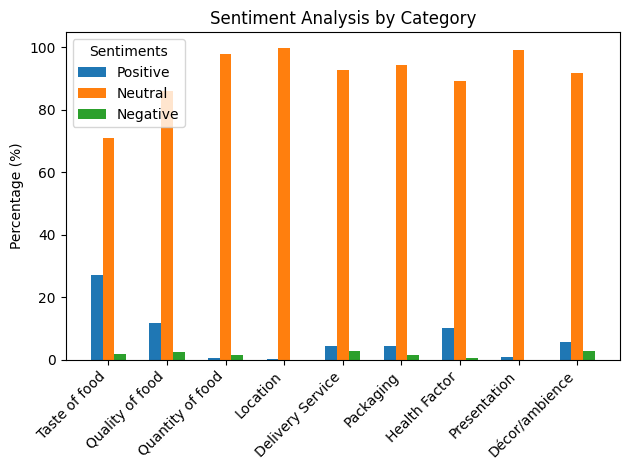

In [27]:
plotting(plot_dict)